### Anaphora resolution

1) Get the pretrained model of FastText from https://fasttext.cc/docs/en/english-vectors.html

2) At the pytorch develop a model, that is a feed forward neural network that consists of three layers, an input layer of size 600, a first layer of size 300, a second layer of 80 and an output layer with two units, all layers have regularization and dropout. The activation function on all layers is ReLU

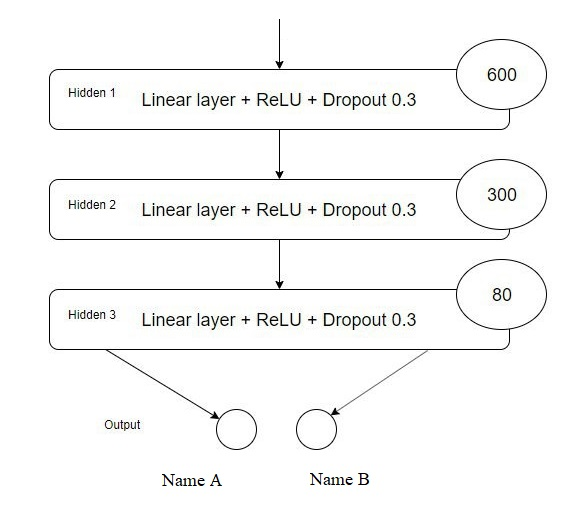

In [1]:
import pandas as pd

In [2]:
df_dev = pd.read_csv('gap-development.tsv',sep='\t')

The task is to identify the target of a pronoun within a text passage. The source text is taken from Wikipedia articles. In the dataset, there are labels of the pronoun and two candidate names to which the pronoun could refer. An algorithm should be capable of deciding whether the pronoun refers to name A, name B, or neither.  
There are the following columns for analysis:
* ID - Unique identifier for an example (Matches to Id in output file format);
* Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length);
* Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length);
* Pronoun - The target pronoun (text);
* Pronoun-offset The character offset of Pronoun in Text;
* A - The first name candidate (text);
* A-offset - The character offset of name A in Text;
* B - The second name candidate;
* B-offset - The character offset of name B in Text;
* URL - The URL of the source Wikipedia page for the example;


In [3]:
df_dev

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera
...,...,...,...,...,...,...,...,...,...,...,...
1995,development-1996,"Faye's third husband, Paul Resnick, reported t...",her,433,Nicole,255,False,Faye,328,True,http://en.wikipedia.org/wiki/Faye_Resnick
1996,development-1997,The plot of the film focuses on the life of a ...,her,246,Doris Chu,111,False,Mei,215,True,http://en.wikipedia.org/wiki/Two_Lies
1997,development-1998,Grant played the part in Trevor Nunn's movie a...,she,348,Maria,259,True,Imelda Staunton,266,False,http://en.wikipedia.org/wiki/Sir_Andrew_Aguecheek
1998,development-1999,The fashion house specialised in hand-printed ...,She,284,Helen,145,True,Suzanne Bartsch,208,False,http://en.wikipedia.org/wiki/Helen_David


In [4]:
df_dev.iloc[0]['Text']

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [5]:
df_val = pd.read_csv('gap-validation.tsv',sep='\t')

In [6]:
df_val

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,validation-1,He admitted making four trips to China and pla...,him,256,Jose de Venecia Jr,208,False,Abalos,241,False,http://en.wikipedia.org/wiki/Commission_on_Ele...
1,validation-2,"Kathleen Nott was born in Camberwell, London. ...",She,185,Ellen,110,False,Kathleen,150,True,http://en.wikipedia.org/wiki/Kathleen_Nott
2,validation-3,"When she returns to her hotel room, a Liberian...",his,435,Jason Scott Lee,383,False,Danny,406,True,http://en.wikipedia.org/wiki/Hawaii_Five-0_(20...
3,validation-4,"On 19 March 2007, during a campaign appearance...",he,333,Reucassel,300,True,Debnam,325,False,http://en.wikipedia.org/wiki/Craig_Reucassel
4,validation-5,"By this time, Karen Blixen had separated from ...",she,427,Finch Hatton,290,False,Beryl Markham,328,True,http://en.wikipedia.org/wiki/Denys_Finch_Hatton
...,...,...,...,...,...,...,...,...,...,...,...
449,validation-450,"He then agrees to name the gargoyle Goldie, af...",He,305,Lucien,252,False,Abel,264,False,http://en.wikipedia.org/wiki/Goldie_(DC_Comics)
450,validation-451,"Disgusted with the family's ``mendacity'', Bri...",she,365,Maggie,242,False,Mae,257,False,http://en.wikipedia.org/wiki/Cat_on_a_Hot_Tin_...
451,validation-452,She manipulates Michael into giving her custod...,she,306,Scarlett,255,False,Alice,291,True,http://en.wikipedia.org/wiki/Michael_Moon_(Eas...
452,validation-453,"On April 4, 1986, Donal Henahan wrote in the N...",her,330,Aida,250,False,Miss Millo,294,True,http://en.wikipedia.org/wiki/Aprile_Millo


In [1]:
### Put your code here


In [5]:
from gensim.models import KeyedVectors

# Creating the model
## Takes a lot of time depending on the vector file size 
en_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec')

In [4]:
import torch
from torch import nn
import torch.nn.functional as F

class MyAnaphoraNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define the layers
        self.layers = nn.Sequential(
            nn.Linear(600, 300),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(300, 80),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(80, 2),
            nn.Dropout(0.3),
            nn.ReLU()
        )
    
    def forward(self, x):
        # forward pass
        x = self.layers(x)
        return x

# instantiate the model
anmodel = MyAnaphoraNetwork()

# print model architecture
print(anmodel)

MyAnaphoraNetwork(
  (layers): Sequential(
    (0): Linear(in_features=600, out_features=300, bias=True)
    (1): Dropout(p=0.3, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=80, bias=True)
    (4): Dropout(p=0.3, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=80, out_features=2, bias=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): ReLU()
  )
)


In [9]:
from gensim.models.fasttext import FastText

In [11]:
type(en_model)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [60]:
label_to_ix = {"True": 0, "False": 1}

In [12]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [ ]:
datasetwiki = load_vectors('wiki-news-300d-1M.vec')

In [9]:
import torch
import torch.nn.functional as F
from torch import nn

# define the network class
class MyNetwork(nn.Module):
    def __init__(self):
        # call constructor from superclass
        super().__init__()
        
        # define network layers
        self.fc1 = nn.Linear(600, 300)
        self.fc2 = nn.Linear(300, 80)
        self.fc3 = nn.Linear(80, 2)
        
    def forward(self, x):
        # define forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

# instantiate the model
model1 = MyNetwork()

# print model architecture
print(model)

MyNetwork(
  (fc1): Linear(in_features=600, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=2, bias=True)
)


In [10]:
from gensim.models import KeyedVectors

# Creating the model
## Takes a lot of time depending on the vector file size 
en_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec')

In [15]:
entvec = en_model.get_vector('Scott')

In [16]:
len(entvec)

300

In [27]:
import inspect

In [37]:
# find all methods
# inspect.getmembers(en_model, predicate=inspect.ismethod)

In [9]:
word_index = en_model.wv.vocab['Scott'].index
word_index

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


2150

In [36]:
en_model.wv.index2word[word_index]

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


'Scott'

In [41]:
from nltk import tokenize
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n|\r', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = text.strip()
    return text

def simple_tokenizer(text, pronoun, candidate_a, candidate_b):
    cleantxt = clean_text(text)
    txt = []
    txt.append(pronoun)
    txt.append(candidate_a)
    txt.append(candidate_b)
    toktxt = tokenize.word_tokenize(cleantxt)
    txt = txt + toktxt
    
    tokenized_text = []
    
    for word in txt:
        try:
            word_index = en_model.wv.vocab[word].index
            tokenized_text.append(word_index)
        except KeyError:
            continue
            
    while len(tokenized_text) < 600:
        tokenized_text.append(0)
    return tokenized_text



def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[str(label['A'])], label_to_ix[label[str('B')]]])

label_to_ix = {"True": 1, "False": 0}

In [13]:
cltxt = clean_text( df_dev.iloc[0]['Text'])
cltxt

"zoe telford -- played the police officer girlfriend of simon, maggie. dumped by simon in the final episode of series 1, after he slept with jenny, and is not seen again. phoebe thomas played cheryl cassidy, pauline's friend and also a year 11 pupil in simon's class. dumped her boyfriend following simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend pauline."

In [14]:
tokvec = simple_tokenizer(cltxt, 'her', 'Cheryl Cassidy','Pauline')
print(len(tokvec))
print(tokvec)

1
tensor([[8.4000e+01, 1.6050e+04, 2.1190e+05, 7.3744e+05, 1.1400e+02, 6.3600e+02,
         1.0000e+00, 4.1400e+02, 1.6520e+03, 6.9720e+03, 4.0000e+00, 9.3425e+04,
         0.0000e+00, 1.9319e+05, 2.0000e+00, 1.1639e+04, 2.5000e+01, 9.3425e+04,
         6.0000e+00, 1.0000e+00, 8.9300e+02, 1.4350e+03, 4.0000e+00, 4.0700e+02,
         1.2000e+02, 0.0000e+00, 7.9000e+01, 5.3000e+01, 1.8794e+04, 1.7000e+01,
         1.5284e+05, 0.0000e+00, 3.0000e+00, 1.3000e+01, 3.4000e+01, 5.2600e+02,
         1.7700e+02, 2.0000e+00, 1.9901e+05, 7.3344e+04, 6.3600e+02, 1.6757e+05,
         4.2160e+05, 0.0000e+00, 5.2525e+05, 2.4000e+01, 1.7540e+03, 3.0000e+00,
         6.0000e+01, 7.0000e+00, 1.4400e+02, 1.6700e+02, 1.2437e+04, 6.0000e+00,
         9.3425e+04, 2.4000e+01, 5.3700e+02, 2.0000e+00, 1.1639e+04, 8.4000e+01,
         8.4860e+03, 2.5900e+02, 9.3425e+04, 2.4000e+01, 1.5390e+03, 7.9000e+01,
         5.3000e+01, 8.1000e+01, 3.6000e+01, 1.8140e+03, 1.7000e+01, 8.4000e+01,
         4.7000e+01, 2.390

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [57]:
model.parameters()

<generator object Module.parameters at 0x7f9e8087a050>

In [59]:
# the model knows its parameters.  The first output below is A, the second is b.
# Whenever you assign a component to a class variable in the __init__ function
# of a module, which was done with the line
# self.linear = nn.Linear(...)
# Then through some Python magic from the PyTorch devs, your module
# (in this case, BoWClassifier) will store knowledge of the nn.Linear's parameters
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0065, -0.0195, -0.0185,  ..., -0.0335,  0.0307,  0.0059],
        [-0.0354, -0.0149, -0.0388,  ..., -0.0234, -0.0210,  0.0384],
        [-0.0390,  0.0264,  0.0385,  ...,  0.0403, -0.0346, -0.0186],
        ...,
        [-0.0029, -0.0401,  0.0057,  ...,  0.0407, -0.0062,  0.0043],
        [-0.0119,  0.0062, -0.0186,  ..., -0.0108, -0.0162,  0.0406],
        [ 0.0015, -0.0109,  0.0124,  ..., -0.0374, -0.0107, -0.0187]],
       requires_grad=True)
Parameter containing:
tensor([ 2.3963e-02, -3.1093e-02, -4.9145e-03,  7.0923e-03,  3.0068e-02,
         3.4195e-02,  2.7411e-02, -3.6295e-03,  3.9245e-03, -9.6981e-04,
        -2.6609e-02,  3.4540e-02,  2.2419e-02,  1.0809e-02, -3.1443e-02,
        -1.6439e-02,  2.6253e-02, -2.9832e-02,  1.4169e-02,  1.2887e-02,
         1.1786e-02,  4.0114e-02, -1.0816e-03, -4.6417e-03, -1.8875e-02,
         9.1205e-03, -3.1352e-02, -4.5860e-03, -2.3400e-02,  2.7424e-02,
        -2.7339e-02,  3.0018e-02, -5.5317e-03,  2.9077e-0

In [ ]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


In [ ]:
# Run on test data before we train, just to see a before-and-after
with torch.no_grad():
    for instance, label in test_data:
        bow_vec = simple_tokenizer(instance)
        log_probs = anmodel(bow_vec)
        print(log_probs)

# Print the matrix column corresponding to "creo"
print(next(anmodel.parameters())[:, word_to_ix["creo"]])

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Usually you want to pass over the training data several times.
# 100 is much bigger than on a real data set, but real datasets have more than
# two instances.  Usually, somewhere between 5 and 30 epochs is reasonable.
for epoch in range(10):
    for instance, label in df_dev:
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        anmodel.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Tensor as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = simple_tokenizer(instance, word_to_ix)
        target = make_target(label, label_to_ix)

        # Step 3. Run our forward pass.
        log_probs = anmodel(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

# Index corresponding to Spanish goes up, English goes down!
print(next(model.parameters())[:, word_to_ix["creo"]])

In [15]:
df_X_dev = pd.DataFrame()
df_X_dev['txt'] =  df_dev['Text']
df_X_dev['pr'] = df_dev['Pronoun']
df_X

,txt,pr
0,Zoe Telford -- played the police officer girlf...,her
1,"He grew up in Evanston, Illinois the second ol...",His
2,"He had been reelected to Congress, but resigne...",his
3,The current members of Crime have also perform...,his
4,Her Santa Fe Opera debut in 2005 was as Nuria ...,She
...,...,...
1995,"Faye's third husband, Paul Resnick, reported t...",her
1996,The plot of the film focuses on the life of a ...,her
1997,Grant played the part in Trevor Nunn's movie a...,she
1998,The fashion house specialised in hand-printed ...,She


In [32]:
count = 0
for row in df_dev.values:
    print(row[1])
    if count > 5:
        break
    count += 1

Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline.
He grew up in Evanston, Illinois the second oldest of five children including his brothers, Fred and Gordon and sisters, Marge (Peppy) and Marilyn. His high school days were spent at New Trier High School in Winnetka, Illinois. MacKenzie studied with Bernard Leach from 1949 to 1952. His simple, wheel-thrown functional pottery is heavily influenced by the oriental aesthetic of Shoji Hamada and Kanjiro Kawai.
He had been reelected to Congress, but resigned in 1990 to accept a post as Ambassador to Brazil. De la Sota again ran for governor of C*rdoba in 1991. Defeated b

In [24]:
print(torch.LongTensor([10,15]))

tensor([10, 15])


In [71]:
vec = torch.Tensor([[10,15]])
vec

tensor([[10., 15.]])

In [27]:
from nltk import tokenize
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n|\r', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = text.strip()
    return text

def simple_tokenizer(text, pronoun, candidate_a, candidate_b):
    
    
    
    cleantxt = clean_text(text)
    txt = []
    txt.append(pronoun)
    txt.append(candidate_a)
    txt.append(candidate_b)
    toktxt = tokenize.word_tokenize(cleantxt)
    txt = txt + toktxt
    
    tokenized_text = []
    
    for word in txt:
        try:
            word_index = en_model.wv.vocab[word].index
            tokenized_text.append(word_index)
        except KeyError:
            continue
            
    while len(tokenized_text) < 600:
        tokenized_text.append(0)
    vec = torch.Tensor([tokenized_text])
    
    return vec.view(1, -1)



def make_target(label, label_to_ix):
    #print(label_to_ix[str(label['A'])])
    #print([label_to_ix[str(label['A'])], label_to_ix[str(label['B'])] ] )
    return torch.LongTensor([[ label_to_ix[str(label['A'])], label_to_ix[str(label['B'])] ]])

label_to_ix = {"True": 1, "False": 0}

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#loss_function = nn.NLLLoss()
b = nn.MSELoss()
a = nn.CrossEntropyLoss()
lossfxn = nn.CrossEntropyLoss()
lossf = nn.MultiLabelMarginLoss()
optimizer = optim.SGD(anmodel.parameters(), lr=0.1)

X = df_dev


# Usually you want to pass over the training data several times.
# 100 is much bigger than on a real data set, but real datasets have more than
# two instances.  Usually, somewhere between 5 and 30 epochs is reasonable.
for epoch in range(10):
    for row in df_dev.values:
        txt = row[1] #row['Text']
        pronoun = row[2] #row['Pronoun']
        ca = row[4] #row['A']
        cb = row[7]#row['B']
        label = {}
        label['A'] = row[6] #row['A-coref']
        label['B'] = row[9] #row['B-coref']
        
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        anmodel.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Tensor as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = simple_tokenizer(txt, pronoun, ca, cb)
        target = make_target(label, label_to_ix)
        
        
        
        # Step 3. Run our forward pass.
        log_probs = anmodel(bow_vec)
        #print('log_probs', log_probs.view(2))
        #print('target',target.view(2))
        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        #lossf(x, y)
        loss = lossf(log_probs, target) #lossfxn(log_probs.view(2), target.view(2))
        #print(loss) # outputs tensor(2.4402)
        
        # loss_a = a(log_probs[0], target[0])
        #loss_b = b(log_probs[1], target[1])
        #loss = loss_a + loss_b
        # loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()





/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


IndexError: string index out of range

In [31]:
for row in df_dev.values:
    print(row)
    break

['development-1'
 "Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."
 'her' 274 'Cheryl Cassidy' 191 True 'Pauline' 207 False
 'http://en.wikipedia.org/wiki/List_of_Teachers_(UK_TV_series)_characters']


In [32]:
with torch.no_grad():
    for row in df_dev.values:
        txt = row[1] #row['Text']
        pronoun = row[2] #row['Pronoun']
        ca = row[4] #row['A']
        cb = row[7]#row['B']
        label = pd.DataFrame()
        label['A'] = row[6] #row['A-coref']
        label['B'] = row[9] #row['B-coref']
        
        bow_vec = simple_tokenizer(txt, pronoun, ca, cb)
        log_probs = anmodel(bow_vec)
        print(log_probs)

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


tensor([[1.1920e+17, 0.0000e+00]])
tensor([[6.9406e+16, 0.0000e+00]])
tensor([[5.8091e+15, 0.0000e+00]])
tensor([[1.5786e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[9.4432e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[1.3900e+17, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[2.3400e+16, 0.0000e+00]])
tensor([[1.2789e+16, 0.0000e+00]])
tensor([[1.8545e+16, 0.0000e+00]])
tensor([[6.4489e+16, 0.0000e+00]])
tensor([[1.4049e+17, 0.0000e+00]])
tensor([[1.8413e+15, 0.0000e+00]])
tensor([[1.2483e+16, 0.0000e+00]])
tensor([[1.8523e+16, 0.0000e+00]])
tensor([[6.5150e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.6480e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.3667e+15, 0.0000e+00]])
tensor([[3.2680e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[4.4953e+17, 0.0000e+00]])
tensor([[4.9454e+15, 0.0000e+00]])
tensor([[2.4062e+15, 0.0000e+00]])
tensor([[3.6165e+15, 0.0000e+00]])
tensor([[5.6978e+15, 0.0000e+00]])
tenso

tensor([[0., 0.]])
tensor([[1.1581e+17, 0.0000e+00]])
tensor([[1.6016e+16, 0.0000e+00]])
tensor([[1.5000e+16, 0.0000e+00]])
tensor([[1.5485e+15, 0.0000e+00]])
tensor([[2.3306e+15, 0.0000e+00]])
tensor([[1.8772e+16, 0.0000e+00]])
tensor([[2.9254e+16, 0.0000e+00]])
tensor([[1.1540e+16, 0.0000e+00]])
tensor([[2.3523e+16, 0.0000e+00]])
tensor([[2.2726e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[6.0906e+15, 0.0000e+00]])
tensor([[4.3848e+15, 0.0000e+00]])
tensor([[3.3289e+15, 0.0000e+00]])
tensor([[6.0208e+15, 0.0000e+00]])
tensor([[3.7030e+14, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[7.6783e+16, 0.0000e+00]])
tensor([[6.7556e+15, 0.0000e+00]])
tensor([[1.5919e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[2.6237e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[9.4591e+15, 0.0000e+00]])
tensor([[5.3701e+14, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[7.7707e+15, 0.0000e+00]])
tensor([[9.8167e+14, 0.0000e+00]])
tensor([[4.9559e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([

tensor([[6.3224e+16, 0.0000e+00]])
tensor([[1.8132e+15, 0.0000e+00]])
tensor([[4.4490e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[2.3094e+15, 0.0000e+00]])
tensor([[2.8159e+17, 0.0000e+00]])
tensor([[1.9775e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[7.6133e+15, 0.0000e+00]])
tensor([[2.5898e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[6.5881e+15, 0.0000e+00]])
tensor([[7.3045e+15, 0.0000e+00]])
tensor([[1.3681e+15, 0.0000e+00]])
tensor([[1.6548e+16, 0.0000e+00]])
tensor([[2.3436e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.2389e+17, 0.0000e+00]])
tensor([[1.3582e+16, 0.0000e+00]])
tensor([[5.6295e+15, 0.0000e+00]])
tensor([[3.5216e+15, 0.0000e+00]])
tensor([[9.2662e+16, 0.0000e+00]])
tensor([[1.4128e+16, 0.0000e+00]])
tensor([[3.4464e+16, 0.0000e+00]])
tensor([[6.6463e+15, 0.0000e+00]])
tensor([[1.7129e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[4.6873e+15, 0.0000e+00]])
tensor([[4.1225e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[4.6817e+15, 0.0000e+00]])
tensor([[1.

tensor([[1.0379e+15, 0.0000e+00]])
tensor([[2.8080e+16, 0.0000e+00]])
tensor([[1.5700e+15, 0.0000e+00]])
tensor([[1.9982e+16, 0.0000e+00]])
tensor([[1.2332e+16, 0.0000e+00]])
tensor([[4.9252e+14, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.7915e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[3.6111e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[5.8404e+15, 0.0000e+00]])
tensor([[1.6283e+16, 0.0000e+00]])
tensor([[3.8573e+16, 0.0000e+00]])
tensor([[7.3844e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[1.9322e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[5.9992e+16, 0.0000e+00]])
tensor([[2.7757e+16, 0.0000e+00]])
tensor([[2.6830e+16, 0.0000e+00]])
tensor([[1.2409e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[7.7440e+14, 0.0000e+00]])
tensor([[5.3512e+15, 0.0000e+00]])
tensor([[1.5471e+16, 0.0000e+00]])
tensor([[2.5194e+16, 0.0000e+00]])
tensor([[8.0916e+15, 0.0000e+00]])
tensor([[3.2607e+15, 0.0000e+00]])
tensor([[3.2834e+15, 0.0

tensor([[2.9810e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[2.6114e+16, 0.0000e+00]])
tensor([[1.3921e+16, 0.0000e+00]])
tensor([[3.1050e+16, 0.0000e+00]])
tensor([[2.3943e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[4.3468e+16, 0.0000e+00]])
tensor([[5.3254e+15, 0.0000e+00]])
tensor([[6.2657e+15, 0.0000e+00]])
tensor([[2.4252e+16, 0.0000e+00]])
tensor([[1.6707e+16, 0.0000e+00]])
tensor([[4.5088e+16, 0.0000e+00]])
tensor([[9.6736e+15, 0.0000e+00]])
tensor([[1.3597e+17, 0.0000e+00]])
tensor([[3.7825e+16, 0.0000e+00]])
tensor([[1.3931e+15, 0.0000e+00]])
tensor([[3.2993e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.0086e+16, 0.0000e+00]])
tensor([[1.2955e+14, 0.0000e+00]])
tensor([[1.5727e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.1897e+15, 0.0000e+00]])
tensor([[7.0179e+14, 0.0000e+00]])
tensor([[1.6379e+15, 0.0000e+00]])
tensor([[3.1220e+16, 0.0000e+00]])
tensor([[3.7819e+15, 0.0000e+00]])
tensor([[1.9207e+15, 0.0000e+00]])
tensor([[4.

tensor([[2.9754e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[3.8245e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[7.5943e+15, 0.0000e+00]])
tensor([[5.7337e+15, 0.0000e+00]])
tensor([[2.4138e+16, 0.0000e+00]])
tensor([[1.7463e+15, 0.0000e+00]])
tensor([[5.7589e+16, 0.0000e+00]])
tensor([[5.7880e+15, 0.0000e+00]])
tensor([[4.9294e+16, 0.0000e+00]])
tensor([[1.0363e+17, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[9.6956e+14, 0.0000e+00]])
tensor([[7.8485e+15, 0.0000e+00]])
tensor([[4.2387e+15, 0.0000e+00]])
tensor([[1.5361e+15, 0.0000e+00]])
tensor([[8.7675e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[1.1512e+15, 0.0000e+00]])
tensor([[2.2889e+15, 0.0000e+00]])
tensor([[3.8673e+15, 0.0000e+00]])
tensor([[4.7156e+14, 0.0000e+00]])
tensor([[6.9075e+14, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[2.8231e+14, 0.0000e+00]])
tensor([[4.9765e+14, 0.0000e+00]])
tensor([[2.9567e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[5.6851e+15, 0.0

tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[3.8412e+16, 0.0000e+00]])
tensor([[6.7889e+14, 0.0000e+00]])
tensor([[1.0083e+17, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[5.0242e+16, 0.0000e+00]])
tensor([[5.6486e+15, 0.0000e+00]])
tensor([[2.0287e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[1.8378e+16, 0.0000e+00]])
tensor([[3.9437e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[7.6638e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[2.0113e+15, 0.0000e+00]])
tensor([[3.4909e+15, 0.0000e+00]])
tensor([[2.7518e+16, 0.0000e+00]])
tensor([[1.1754e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[9.7704e+15, 0.0000e+00]])
tensor([[4.6615e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[2.6548e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[0., 0.]])
tensor([[8.7204e+16, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[3.2306e+16, 0.0000e+00]])
tensor([[3.3786e+15, 0.0000e+00]])
tensor([[7.2383e+15, 0.0000e+00

tensor([[7.7156e+15, 0.0000e+00]])
tensor([[0., 0.]])
tensor([[8.2887e+14, 0.0000e+00]])
tensor([[1.7780e+17, 0.0000e+00]])


In [23]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
print('input', input)
target = torch.empty(3, dtype=torch.long).random_(5)
print('target', target)
output = loss(input, target)
output.backward()

input tensor([[-1.8322,  0.5050, -0.4250,  0.7594, -0.8195],
        [-0.6360,  0.5347, -2.3115, -0.4379, -0.1315],
        [ 0.4859, -0.5824,  1.6323, -1.7086, -0.4659]], requires_grad=True)
target tensor([2, 0, 4])


In [24]:
loss = nn.MultiLabelMarginLoss()
x = torch.FloatTensor([[0.1, 0.2, 0.4, 0.8]])
print(x)
# for target y, only consider labels 3 and 0, not after label -1
y = torch.LongTensor([[3, 0, -1, 1]])
print(y)
print(loss(x, y))

tensor([[0.1000, 0.2000, 0.4000, 0.8000]])
tensor([[ 3,  0, -1,  1]])
tensor(0.8500)


In [44]:
label_to_ix['True']

1

In [20]:
# Getting the tokens 
words = []
for word in en_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(en_model[words[0]])
))

# Print out the vector of a word 
print("Vector components of a word: {}".format(
    en_model[words[0]]
))

# Pick a word 
find_similar_to = 'car'

# Finding out similar words [default= top 10]
for similar_word in en_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Number of Tokens: 999994
Dimension of a word vector: 300
Vector components of a word: [ 1.0730e-01  8.9000e-03  6.0000e-04  5.5000e-03 -6.4600e-02 -6.0000e-02
  4.5000e-02 -1.3300e-02 -3.5700e-02  4.3000e-02 -3.5600e-02 -3.2000e-03
  7.3000e-03 -1.0000e-04  2.5800e-02 -1.6600e-02  7.5000e-03  6.8600e-02
  3.9200e-02  7.5300e-02  1.1500e-02 -8.7000e-03  4.2100e-02  2.6500e-02
 -6.0100e-02  2.4200e-01  1.9900e-02 -7.3900e-02 -3.1000e-03 -2.6300e-02
 -6.2000e-03  1.6800e-02 -3.5700e-02 -2.4900e-02  1.9000e-02 -1.8400e-02
 -5.3700e-02  1.4200e-01  6.0000e-02  2.2600e-02 -3.8000e-03 -6.7500e-02
 -3.6000e-03 -8.0000e-03  5.7000e-02  2.0800e-02  2.2300e-02 -2.5600e-02
 -1.5300e-02  2.2000e-03 -4.8200e-02  1.3100e-02 -6.0160e-01 -8.8000e-03
  1.0600e-02  2.2900e-02  3.3600e-02  7.1000e-03  8.8700e-02  2.3700e-02
 -2.9000e-02 -4.0500e-02 -1.2500e-02  1.4700e-02  4.7500e-02  6.4700e-02
  4.7400e-02  1.9900e-02  4.0800e-02  3.2200e-02  3.6000e-03  3.5000e-02
 -7.2300e-02 -3.0500e-02  1.8400e-02 -

In [25]:
import torch
from torch import nn
import torch.nn.functional as F

class MyNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define the layers
        self.layers = nn.Sequential(
            nn.Linear(600, 300),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(300, 80),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(80, 2),
            nn.Dropout(0.3)
        )
    
    def forward(self, x):
        # forward pass
        x = nn.ReLU(self.layers(x))
        return x

# instantiate the model
model = MyNetwork2()

# print model architecture
print(model)

MyNetwork2(
  (layers): Sequential(
    (0): Linear(in_features=600, out_features=300, bias=True)
    (1): Dropout(p=0.3, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=80, bias=True)
    (4): Dropout(p=0.3, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=80, out_features=2, bias=True)
    (7): Dropout(p=0.3, inplace=False)
  )
)


In [26]:
# Construct the loss function
criterion = torch.nn.MSELoss()
# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [29]:
en_model.most_similar('car')

[('cars', 0.8045914769172668),
 ('automobile', 0.766738772392273),
 ('vehicle', 0.7534860372543335),
 ('Car', 0.717795193195343),
 ('truck', 0.6989946961402893),
 ('SUV', 0.689612865447998),
 ('automobiles', 0.6783527731895447),
 ('dealership', 0.6682884097099304),
 ('garage', 0.6681075692176819),
 ('driver', 0.6541328430175781)]

In [27]:
y_pred = model(df_dev.iloc[0]['Text'])
y_pred

AttributeError: 'str' object has no attribute 'dim'

In [ ]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [ ]:

# Gradient Descent
for epoch in range(20):
   # Forward pass: Compute predicted y by passing x to the model
   y_pred = model(x)

   # Compute and print loss
   loss = criterion(y_pred, y)
   print('epoch: ', epoch,' loss: ', loss.item())

   # Zero gradients, perform a backward pass, and update the weights.
   optimizer.zero_grad()

   # perform a backward pass (backpropagation)
   loss.backward()

   # Update the parameters
   optimizer.step()